# Exercise 2 (Introduction to computational intelligence)
<center><strong>
سیدنیما معین تقوی 9822762211
</strong></center>

## Preprocessing
We use the mean value to fill missing values. In addition, we convert columns containing string values to integers, so that we can use them in our neural models. The method used to do this is better than using dummy variables because most of the string data are ratings or similar to ratings, meaning that a higher amount is better, and a lower amount is worse.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/uni/train.csv')
df1 = pd.read_csv('/content/drive/MyDrive/uni/test.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
df.isnull().sum() / len(df)

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [7]:
df['Arrival Delay in Minutes'].mean()

15.178678301832152

In [8]:
mean = df['Arrival Delay in Minutes'].mean()

def transform_fun(x):
  if pd.isnull(x):
    return mean
  else:
    return x

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].apply(transform_fun)

In [9]:
mean = df1['Arrival Delay in Minutes'].mean()

def transform_fun(x):
  if pd.isnull(x):
    return mean
  else:
    return x

df1['Arrival Delay in Minutes'] = df1['Arrival Delay in Minutes'].apply(transform_fun)

In [10]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
df['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [12]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [13]:
df1['Gender'] = df1['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [14]:
df['Gender'].value_counts()

1    52727
0    51177
Name: Gender, dtype: int64

In [15]:
df['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [16]:
df['Customer Type'] = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)

In [17]:
df1['Customer Type'] = df1['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)

In [18]:
df['Customer Type'].value_counts()

1    84923
0    18981
Name: Customer Type, dtype: int64

In [19]:
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [20]:
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)

In [21]:
df1['Type of Travel'] = df1['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)

In [22]:
df['Type of Travel'].value_counts()

1    71655
0    32249
Name: Type of Travel, dtype: int64

In [23]:
df['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [24]:
def transform_fun(x):
  if x == 'Business':
    return 2
  elif x == 'Eco Plus':
    return 1
  else:
    return 0

df['Class'] = df['Class'].apply(transform_fun)

In [25]:
def transform_fun(x):
  if x == 'Business':
    return 2
  elif x == 'Eco Plus':
    return 1
  else:
    return 0

df1['Class'] = df1['Class'].apply(transform_fun)

In [26]:
df['Class'].value_counts()

2    49665
0    46745
1     7494
Name: Class, dtype: int64

In [27]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [28]:
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [29]:
df1['satisfaction'] = df1['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [30]:
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int64  
 3   Customer Type                      103904 non-null  int64  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  int64  
 6   Class                              103904 non-null  int64  
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [32]:
df = df.drop('Unnamed: 0',axis=1)

In [33]:
df1 = df1.drop('Unnamed: 0',axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Customer Type                      103904 non-null  int64  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int64  
 5   Class                              103904 non-null  int64  
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [35]:
df = df.drop('id',axis=1)

In [36]:
df1 = df1.drop('id',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


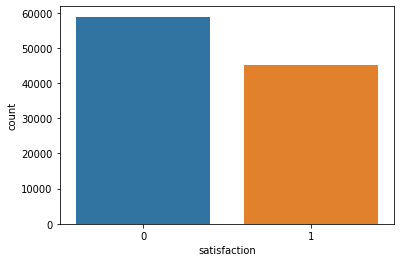

In [37]:
sns.countplot(df['satisfaction'])

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
X_train = df.drop('satisfaction', axis=1).values
y_train = df['satisfaction'].values

X_test = df.drop('satisfaction', axis=1).values
y_test = df['satisfaction'].values

In [40]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## With hidden layers

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [42]:
X_train.shape[1:]

(22,)

### Without using kernel method

In [ ]:
model = Sequential()

model.add(keras.layers.Input(shape=X_train.shape[1:]))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max', verbose=1, patience= 5)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, batch_size=128,
          validation_data=(X_test,y_test))

Epoch 1/600
812/812 [==============================] - 4s 4ms/step - loss: 0.5124 - accuracy: 0.7448 - val_loss: 0.3104 - val_accuracy: 0.8855
Epoch 2/600
812/812 [==============================] - 2s 3ms/step - loss: 0.3477 - accuracy: 0.8703 - val_loss: 0.2504 - val_accuracy: 0.9046
Epoch 3/600
812/812 [==============================] - 2s 3ms/step - loss: 0.2960 - accuracy: 0.8896 - val_loss: 0.2137 - val_accuracy: 0.9179
Epoch 4/600
812/812 [==============================] - 3s 3ms/step - loss: 0.2645 - accuracy: 0.9006 - val_loss: 0.1879 - val_accuracy: 0.9242
Epoch 5/600
812/812 [==============================] - 2s 3ms/step - loss: 0.2414 - accuracy: 0.9079 - val_loss: 0.1672 - val_accuracy: 0.9323
Epoch 6/600
812/812 [==============================] - 3s 3ms/step - loss: 0.2224 - accuracy: 0.9159 - val_loss: 0.1574 - val_accuracy: 0.9385
Epoch 7/600
812/812 [==============================] - 3s 3ms/step - loss: 0.2125 - accuracy: 0.9196 - val_loss: 0.1479 - val_accuracy: 0.9413

KeyboardInterrupt: ignored

### Using kernel method

In [ ]:
model = Sequential()

model.add(keras.layers.Input(shape=X_train.shape[1:]))

model.add(keras.layers.experimental.RandomFourierFeatures(
      output_dim=400,
      kernel_initializer='gaussian'),
)

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(75, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=2, batch_size=128,
          validation_data=(X_test,y_test))

Epoch 1/2
812/812 [==============================] - 6s 7ms/step - loss: 0.2206 - accuracy: 0.9106 - val_loss: 0.1466 - val_accuracy: 0.9392
Epoch 2/2
812/812 [==============================] - 4s 5ms/step - loss: 0.1538 - accuracy: 0.9364 - val_loss: 0.1247 - val_accuracy: 0.9475


In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, batch_size=128,
          validation_data=(X_test,y_test))

Epoch 1/20
812/812 [==============================] - 5s 7ms/step - loss: 0.1381 - accuracy: 0.9426 - val_loss: 0.1191 - val_accuracy: 0.9501
Epoch 2/20
812/812 [==============================] - 5s 6ms/step - loss: 0.1317 - accuracy: 0.9451 - val_loss: 0.1189 - val_accuracy: 0.9520
Epoch 3/20
812/812 [==============================] - 4s 5ms/step - loss: 0.1269 - accuracy: 0.9469 - val_loss: 0.1123 - val_accuracy: 0.9519
Epoch 4/20
812/812 [==============================] - 5s 6ms/step - loss: 0.1229 - accuracy: 0.9489 - val_loss: 0.1073 - val_accuracy: 0.9532
Epoch 5/20
812/812 [==============================] - 5s 6ms/step - loss: 0.1205 - accuracy: 0.9497 - val_loss: 0.1085 - val_accuracy: 0.9543
Epoch 6/20
812/812 [==============================] - 5s 6ms/step - loss: 0.1185 - accuracy: 0.9504 - val_loss: 0.1074 - val_accuracy: 0.9556
Epoch 7/20
812/812 [==============================] - 5s 6ms/step - loss: 0.1167 - accuracy: 0.9512 - val_loss: 0.0995 - val_accuracy: 0.9575
Epoch 

In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=128,
          validation_data=(X_test,y_test))

Epoch 1/10
812/812 [==============================] - 5s 7ms/step - loss: 0.1036 - accuracy: 0.9566 - val_loss: 0.0941 - val_accuracy: 0.9587
Epoch 2/10
812/812 [==============================] - 5s 6ms/step - loss: 0.1041 - accuracy: 0.9563 - val_loss: 0.0976 - val_accuracy: 0.9573
Epoch 3/10
812/812 [==============================] - 4s 5ms/step - loss: 0.1019 - accuracy: 0.9571 - val_loss: 0.0891 - val_accuracy: 0.9619
Epoch 4/10
812/812 [==============================] - 5s 6ms/step - loss: 0.1027 - accuracy: 0.9561 - val_loss: 0.0875 - val_accuracy: 0.9623
Epoch 5/10
812/812 [==============================] - 5s 6ms/step - loss: 0.1011 - accuracy: 0.9566 - val_loss: 0.0891 - val_accuracy: 0.9620
Epoch 6/10
812/812 [==============================] - 5s 6ms/step - loss: 0.1017 - accuracy: 0.9568 - val_loss: 0.0880 - val_accuracy: 0.9611
Epoch 7/10
812/812 [==============================] - 4s 5ms/step - loss: 0.1028 - accuracy: 0.9564 - val_loss: 0.0878 - val_accuracy: 0.9624
Epoch 

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, batch_size=128,
          validation_data=(X_test,y_test))

Epoch 1/20
812/812 [==============================] - 5s 7ms/step - loss: 0.0997 - accuracy: 0.9579 - val_loss: 0.0862 - val_accuracy: 0.9628
Epoch 2/20
812/812 [==============================] - 6s 7ms/step - loss: 0.1000 - accuracy: 0.9580 - val_loss: 0.0891 - val_accuracy: 0.9618
Epoch 3/20
812/812 [==============================] - 4s 5ms/step - loss: 0.1002 - accuracy: 0.9575 - val_loss: 0.0890 - val_accuracy: 0.9629
Epoch 4/20
812/812 [==============================] - 4s 5ms/step - loss: 0.0995 - accuracy: 0.9578 - val_loss: 0.0851 - val_accuracy: 0.9632
Epoch 5/20
812/812 [==============================] - 4s 5ms/step - loss: 0.0984 - accuracy: 0.9580 - val_loss: 0.0932 - val_accuracy: 0.9607
Epoch 6/20
812/812 [==============================] - 4s 5ms/step - loss: 0.0994 - accuracy: 0.9581 - val_loss: 0.0878 - val_accuracy: 0.9623
Epoch 7/20
812/812 [==============================] - 5s 6ms/step - loss: 0.1002 - accuracy: 0.9578 - val_loss: 0.0870 - val_accuracy: 0.9624
Epoch 

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, batch_size=128,
          validation_data=(X_test,y_test))

Epoch 1/20
812/812 [==============================] - 6s 8ms/step - loss: 0.0976 - accuracy: 0.9584 - val_loss: 0.0844 - val_accuracy: 0.9640
Epoch 2/20
812/812 [==============================] - 5s 6ms/step - loss: 0.0977 - accuracy: 0.9580 - val_loss: 0.0961 - val_accuracy: 0.9590
Epoch 3/20
812/812 [==============================] - 5s 6ms/step - loss: 0.0973 - accuracy: 0.9583 - val_loss: 0.0844 - val_accuracy: 0.9636
Epoch 4/20
812/812 [==============================] - 4s 5ms/step - loss: 0.0951 - accuracy: 0.9601 - val_loss: 0.0863 - val_accuracy: 0.9622
Epoch 5/20
812/812 [==============================] - 5s 6ms/step - loss: 0.0951 - accuracy: 0.9593 - val_loss: 0.0835 - val_accuracy: 0.9638
Epoch 6/20
812/812 [==============================] - 5s 6ms/step - loss: 0.0955 - accuracy: 0.9589 - val_loss: 0.0874 - val_accuracy: 0.9612
Epoch 7/20
812/812 [==============================] - 4s 5ms/step - loss: 0.0966 - accuracy: 0.9585 - val_loss: 0.0857 - val_accuracy: 0.9628
Epoch 

### Conclusion

Better results are obvious.  
Without kernel method: max(val_accuracy) = 0.9556   
With kernel method: max(val_accuracy) = 0.9640

## Without hidden layers

### Without using kernel method

In [ ]:
model = Sequential()

model.add(keras.layers.Input(shape=X_train.shape[1:]))

model.add(Dense(units=1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=40, batch_size=32,
          validation_data=(X_test,y_test))

Epoch 1/40
3247/3247 [==============================] - 11s 3ms/step - loss: 0.5542 - accuracy: 0.7426 - val_loss: 0.4800 - val_accuracy: 0.7952
Epoch 2/40
3247/3247 [==============================] - 10s 3ms/step - loss: 0.4515 - accuracy: 0.8125 - val_loss: 0.4290 - val_accuracy: 0.8256
Epoch 3/40
3247/3247 [==============================] - 11s 3ms/step - loss: 0.4143 - accuracy: 0.8353 - val_loss: 0.4015 - val_accuracy: 0.8430
Epoch 4/40
3247/3247 [==============================] - 11s 3ms/step - loss: 0.3924 - accuracy: 0.8488 - val_loss: 0.3842 - val_accuracy: 0.8519
Epoch 5/40
3247/3247 [==============================] - 10s 3ms/step - loss: 0.3780 - accuracy: 0.8566 - val_loss: 0.3722 - val_accuracy: 0.8605
Epoch 6/40
3247/3247 [==============================] - 10s 3ms/step - loss: 0.3681 - accuracy: 0.8618 - val_loss: 0.3640 - val_accuracy: 0.8646
Epoch 7/40
3247/3247 [==============================] - 10s 3ms/step - loss: 0.3611 - accuracy: 0.8653 - val_loss: 0.3585 - val_ac

### Using kernel method

In [ ]:
model = Sequential()

model.add(keras.layers.Input(shape=X_train.shape[1:]))

model.add(keras.layers.experimental.RandomFourierFeatures(
      output_dim=400,
      kernel_initializer='gaussian'),
)

model.add(Dense(units=1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, batch_size=32,
          validation_data=(X_test,y_test))

Epoch 1/20
3247/3247 [==============================] - 12s 4ms/step - loss: 0.3306 - accuracy: 0.8727 - val_loss: 0.3063 - val_accuracy: 0.8822
Epoch 2/20
3247/3247 [==============================] - 12s 4ms/step - loss: 0.2965 - accuracy: 0.8857 - val_loss: 0.2852 - val_accuracy: 0.8910
Epoch 3/20
3247/3247 [==============================] - 11s 3ms/step - loss: 0.2795 - accuracy: 0.8925 - val_loss: 0.2720 - val_accuracy: 0.8943
Epoch 4/20
3247/3247 [==============================] - 11s 3ms/step - loss: 0.2673 - accuracy: 0.8966 - val_loss: 0.2620 - val_accuracy: 0.9002
Epoch 5/20
3247/3247 [==============================] - 11s 3ms/step - loss: 0.2583 - accuracy: 0.8993 - val_loss: 0.2520 - val_accuracy: 0.9031
Epoch 6/20
3247/3247 [==============================] - 11s 4ms/step - loss: 0.2503 - accuracy: 0.9033 - val_loss: 0.2444 - val_accuracy: 0.9059
Epoch 7/20
3247/3247 [==============================] - 11s 3ms/step - loss: 0.2439 - accuracy: 0.9059 - val_loss: 0.2387 - val_ac

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, batch_size=32,
          validation_data=(X_test,y_test))

Epoch 1/20
3247/3247 [==============================] - 12s 4ms/step - loss: 0.2075 - accuracy: 0.9195 - val_loss: 0.2051 - val_accuracy: 0.9204
Epoch 2/20
3247/3247 [==============================] - 12s 4ms/step - loss: 0.2067 - accuracy: 0.9192 - val_loss: 0.2074 - val_accuracy: 0.9210
Epoch 3/20
3247/3247 [==============================] - 11s 4ms/step - loss: 0.2054 - accuracy: 0.9197 - val_loss: 0.2047 - val_accuracy: 0.9218
Epoch 4/20
3247/3247 [==============================] - 11s 3ms/step - loss: 0.2042 - accuracy: 0.9205 - val_loss: 0.2015 - val_accuracy: 0.9204
Epoch 5/20
3247/3247 [==============================] - 12s 4ms/step - loss: 0.2036 - accuracy: 0.9206 - val_loss: 0.2014 - val_accuracy: 0.9200
Epoch 6/20
3247/3247 [==============================] - 11s 3ms/step - loss: 0.2028 - accuracy: 0.9206 - val_loss: 0.2001 - val_accuracy: 0.9219
Epoch 7/20
3247/3247 [==============================] - 11s 3ms/step - loss: 0.2019 - accuracy: 0.9212 - val_loss: 0.2001 - val_ac

### Conclusion

Better results are obvious.  
Without kernel method: max(val_accuracy) = 0.8756   
With kernel method: max(val_accuracy) = 0.9244

## SVM with rbf (default in sklearn) kernel type 

In [44]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, clf.predict(X_train))

0.9524464890668309

## Conclusion
The results have shown an obvious increase in accuracy when using kernel methods, even within the initial epochs.  
Also, the best neural network model's result is better than the SVM model's result.  

Review: (with hidden layers)  
Without kernel method: max(val_accuracy) = 0.9556  
With kernel method: max(val_accuracy) = 0.9640  
(without hidden layers)   
Without kernel method: max(val_accuracy) = 0.8756  
With kernel method: max(val_accuracy) = 0.9244

SVM score: 0.9524